### Script di prova per valutare se PsiMethod.py funziona correttamente. OBS() è una funzione che simula il ruolo dell'osservatore, di cui definisco un th e b

C:\Users\User\OneDrive\Desktop\Report\Psi method\Python to Unity\Francesca\PsiMethod.py:65: RuntimeWarning: divide by zero encountered in log
  tmp = np.log(posterior_failure[i,:])
C:\Users\User\OneDrive\Desktop\Report\Psi method\Python to Unity\Francesca\PsiMethod.py:61: RuntimeWarning: divide by zero encountered in log
  tmp = np.log(posterior_success[i,:])


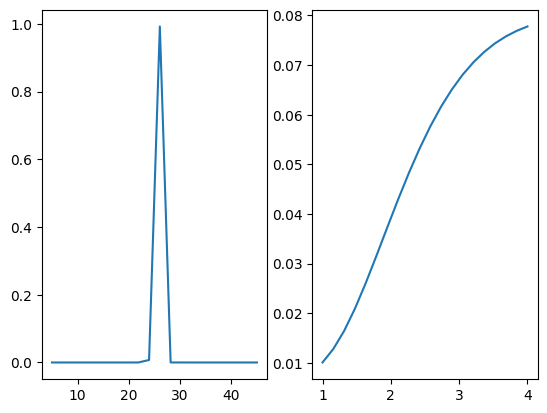

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PsiMethod
        
def SIGMOID(x,th,b):
    
        AFC = 1/2
        P = AFC + (1-AFC)*1/(1+1*np.exp(-b*(x-th)))
    
        return P

def OBS(slant):
    
    th_true = 25
    b_true = 3
    
    a = SIGMOID(slant,th_true,b_true)
    r = np.random.choice([0,1], p=[1-a,a])
    
    return r

slant_min = 0
slant_max = 60
th_min = 5
th_max = 45
b_min = 1
b_max = 4
nVal = 20
nComb = nVal**2 # Combinations (param vectors)
nSlant = 100

# Initialized
[lookup_table, prior, slant_space, param_space] = PsiMethod.InitData(slant_min, slant_max, th_min, th_max, b_min, b_max, nVal, nSlant)

for i in range(30):

    [slant_next, p_success] = PsiMethod.GetCurrentTrial(lookup_table, prior, nSlant, nVal)

    resp_data = OBS(slant_space[slant_next])

    prior_updated = PsiMethod.UpdatePrior(lookup_table, prior, p_success, resp_data, slant_next)
    prior = prior_updated
    
PsiMethod.SaveResults(nVal, prior, param_space)